In [198]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:
from collections import Counter
from sklearn.cluster import MeanShift
import pandas as pd
from src.utils_clustering import *
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import estimate_bandwidth
import time

In [200]:
N_CLASSES = 15

In [201]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [202]:
pairwise_dist = pairwise_distances(processed_data)
quantile_value = 0.055  
bandwidth = np.quantile(pairwise_dist, quantile_value)

In [203]:
# Start measuring time
start_time = time.time()

meanshift_clustering = MeanShift(bandwidth=bandwidth)
labels_pred = meanshift_clustering.fit_predict(processed_data)

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time

In [204]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({3: 352, 1: 351, 0: 351, 2: 349, 4: 345, 8: 341, 12: 340, 7: 335, 6: 334, 9: 329, 5: 327, 11: 319, 13: 316, 10: 314, 14: 297})


In [205]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [206]:
clustering_algorithm_name = 'MeanShift_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

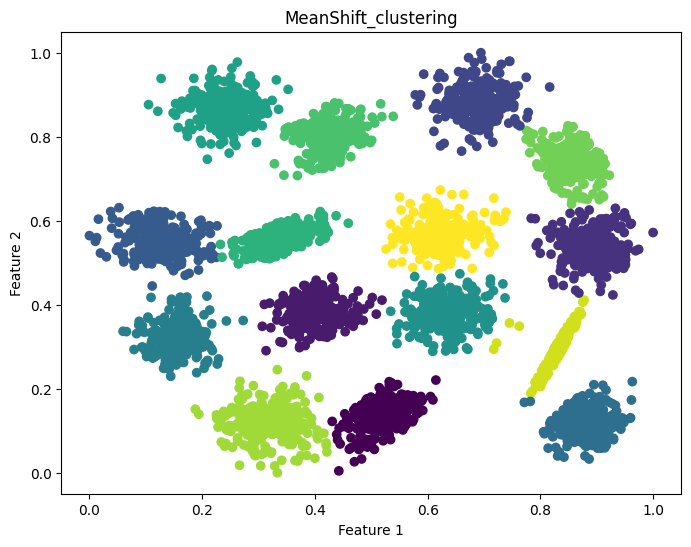

In [207]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [208]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


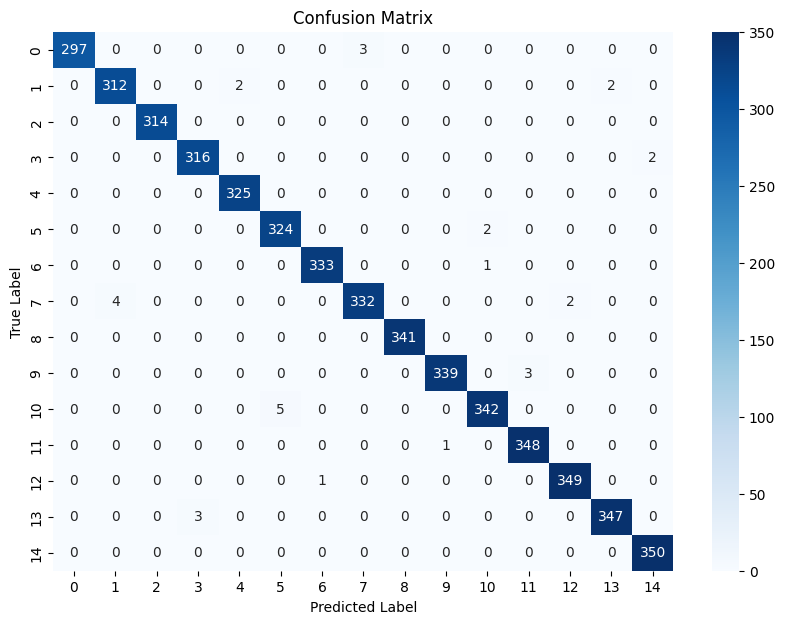

Each cluster's accuracy indicates how well the clustering algorithm has grouped the data points,
compared to the ground truth labels. Higher accuracy means a closer match to the expected grouping.

Cluster 1 Accuracy: 99.00%
Cluster 2 Accuracy: 98.73%
Cluster 3 Accuracy: 100.00%
Cluster 4 Accuracy: 99.37%
Cluster 5 Accuracy: 100.00%
Cluster 6 Accuracy: 99.39%
Cluster 7 Accuracy: 99.70%
Cluster 8 Accuracy: 98.22%
Cluster 9 Accuracy: 100.00%
Cluster 10 Accuracy: 99.12%
Cluster 11 Accuracy: 98.56%
Cluster 12 Accuracy: 99.71%
Cluster 13 Accuracy: 99.71%
Cluster 14 Accuracy: 99.14%
Cluster 15 Accuracy: 100.00%

Overall Accuracy: 99.38%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [209]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [210]:
algorithm_params = meanshift_clustering.get_params()
algorithm_details = str(algorithm_params)

In [211]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 03:58:44.841243
Dataset: s1
Clustering Algorithm: MeanShift_clustering
Algorithm Details: {'bandwidth': 0.08459728472101341, 'bin_seeding': False, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': None, 'seeds': None}
Running Time (seconds): 4.586567163467407
Accuracy: 0.9938
